In [1]:
import pandas as pd
import numpy as np

In [310]:
train = pd.read_csv('train.csv', sep = ';')

In [311]:
train.head()

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,...,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary
0,0,Специалист,Тульская область,"Государственная служба, некоммерческие организ...",7100000100000,Тула,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,True,NaN,NaN,64.0,2020-05-07,2020-05-08,2020-05-07,37500
1,1,Лаборант,Алтайский край,"Государственная служба, некоммерческие организ...",2200000100000,Барнаул,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,True,True,NaN,NaN,88.0,2020-10-21,2020-10-27,2020-10-27,14000
2,3,"Специалист, администратор, бухгалтер, экономист",Ульяновская область,"Административная работа, секретариат, АХО",7300000200000,Димитровград,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,NaN,True,NaN,NaN,78.0,2019-04-25,2020-02-04,2020-02-04,24600
3,4,Специалист,Свердловская область,"Государственная служба, некоммерческие организ...",6600002300000,Нижний Тагил,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,False,NaN,NaN,91.0,2020-09-19,2020-09-20,2020-09-19,16075
4,5,Инструктор по плаванию,Иркутская область,"Здравоохранение, спорт, красота, социальное об...",3800000400000,Ангарск,NaN,NaN,Российская Федерация,Полный рабочий день,...,False,NaN,NaN,NaN,NaN,58.0,2020-04-20,2020-09-09,2020-04-21,22080


In [312]:
train.describe()

,id,locality,age,experience,salary_desired,completeness_rate,salary
count,306270.000000,3.062700e+05,298459.000000,306270.000000,3.062700e+05,306270.000000,3.062700e+05
mean,218700.540370,4.778910e+12,35.661344,5.748225,3.364235e+04,69.068528,4.094132e+04
std,126304.952581,2.352877e+12,12.616996,7.745237,2.272811e+04,17.125725,3.535889e+04
min,0.000000,0.000000e+00,2.000000,0.000000,-8.304000e+04,0.000000,0.000000e+00
25%,109335.250000,2.400002e+12,28.000000,0.000000,2.000000e+04,61.000000,2.162300e+04
50%,218685.500000,5.200000e+12,34.000000,3.000000,3.000000e+04,71.000000,3.091200e+04
75%,328055.750000,6.600002e+12,42.000000,9.000000,4.000000e+04,81.000000,4.750000e+04
max,437525.000000,9.900000e+12,1936.000000,937.000000,1.069556e+06,100.000000,2.283641e+06


In [313]:
len(train)

306270

In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306270 entries, 0 to 306269
Data columns (total 25 columns):
id                            306270 non-null int64
position                      306270 non-null object
region                        306258 non-null object
industry                      306270 non-null object
locality                      306270 non-null int64
locality_name                 290778 non-null object
education_type                266238 non-null object
drive_licences                121925 non-null object
citizenship                   306270 non-null object
schedule                      306270 non-null object
employement_type              306270 non-null object
age                           298459 non-null float64
gender                        298497 non-null object
experience                    306270 non-null int64
salary_desired                306270 non-null int64
relocation_ready              233567 non-null object
travel_ready                  237054 non-nul

In [315]:
loc_dict = dict(train['locality'].value_counts())

In [316]:
first_fifty_cities = list(loc_dict.keys())[0:50]

In [317]:
train[train['locality'].isin(first_fifty_cities)]

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,...,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary
0,0,Специалист,Тульская область,"Государственная служба, некоммерческие организ...",7100000100000,Тула,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,True,NaN,NaN,64.0,2020-05-07,2020-05-08,2020-05-07,37500
1,1,Лаборант,Алтайский край,"Государственная служба, некоммерческие организ...",2200000100000,Барнаул,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,True,True,NaN,NaN,88.0,2020-10-21,2020-10-27,2020-10-27,14000
3,4,Специалист,Свердловская область,"Государственная служба, некоммерческие организ...",6600002300000,Нижний Тагил,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,False,NaN,NaN,91.0,2020-09-19,2020-09-20,2020-09-19,16075
4,5,Инструктор по плаванию,Иркутская область,"Здравоохранение, спорт, красота, социальное об...",3800000400000,Ангарск,NaN,NaN,Российская Федерация,Полный рабочий день,...,False,NaN,NaN,NaN,NaN,58.0,2020-04-20,2020-09-09,2020-04-21,22080
5,8,учитель технологии,Тюменская область,"Образование, наука",7200000000000,Тюменская,NaN,NaN,Российская Федерация,Полный рабочий день,...,False,True,True,NaN,NaN,57.0,2019-08-09,2019-08-09,2019-08-09,31140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306258,437511,"Юрисконсульт, юрист, участковый, секретарь, на...",г. Санкт-Петербург,Юриспруденция,7800000000000,Санкт-Петербург,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,True,NaN,NaN,83.0,2020-09-25,2020-09-30,2020-09-25,49680
306259,437512,Психолог,Краснодарский край,"Образование, наука",2300000100000,Краснодар,Незаконченное высшее,NaN,Российская Федерация,Полный рабочий день,...,NaN,NaN,NaN,NaN,NaN,60.0,2020-09-11,2020-09-23,2020-09-19,15000
306260,437514,"Техник, инженер младшей категории",Республика Татарстан,"Информационные технологии, телекоммуникации, с...",1600000100000,Казань,Среднее профессиональное,NaN,Российская Федерация,Полный рабочий день,...,True,True,True,NaN,NaN,84.0,2016-12-17,2020-01-14,2018-03-01,86898
306261,437516,Управляющий,Тюменская область,"Продажи, закупки, снабжение, торговля",7200000100000,Тюмень,NaN,"[A, B]",Российская Федерация,Полный рабочий день,...,False,True,True,NaN,NaN,74.0,2020-04-14,2020-04-14,2020-04-14,32500


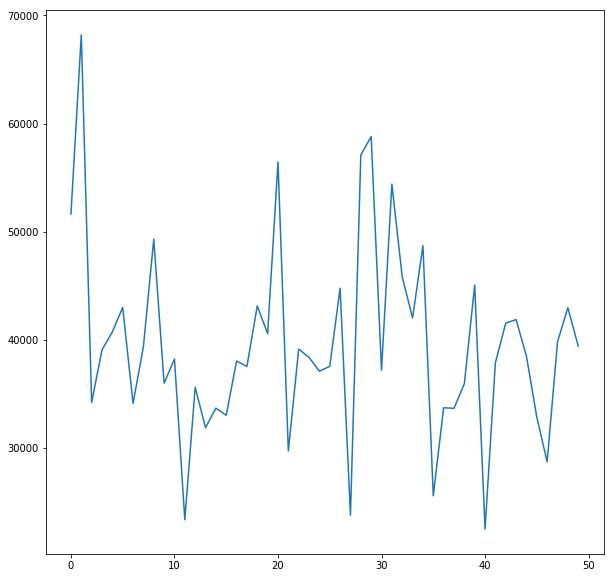

In [318]:
import matplotlib.pyplot as plt

mean_arr = []
for city in first_fifty_cities:
    mean_arr.append(train[train['locality'] == city]['salary'].mean())
fig = plt.figure(figsize = (10, 10))
ax = plt.plot([x for x in range(50)], mean_arr)
plt.show()

### Обработка ошибок и пропущенных значений

In [319]:
print(train.columns)

Index(['id', 'position', 'region', 'industry', 'locality', 'locality_name',
       'education_type', 'drive_licences', 'citizenship', 'schedule',
       'employement_type', 'age', 'gender', 'experience', 'salary_desired',
       'relocation_ready', 'travel_ready', 'retraining_ready',
       'is_worldskills_participant', 'has_qualifications', 'completeness_rate',
       'creation_date', 'modification_date', 'publish_date', 'salary'],
      dtype='object')


### position - обработка через txt с профессиями
### locality - заменить на столица региона/нет или на среднее по городу
### locality_name не нужно

In [320]:
city_region_dict = {} # словарь город - область, может понадобиться для заполнения пропусков в столбце region
for i in range(len(train)):
    if (not pd.isna(train.at[i, 'region'])):
        if ((train.at[i, 'locality'] in city_region_dict) and (city_region_dict[train.at[i, 'locality']] != train.at[i, 'region'])):
            print('Error')
        else:
            city_region_dict[train.at[i, 'locality']] = train.at[i, 'region']

In [321]:
for i in range(len(train)):
    if (pd.isna(train.at[i, 'region'])):
        if (not train.at[i, 'locality'] in city_region_dict):
            print('Problem')
        else:
            train.at[i, 'region'] = city_region_dict[train.at[i, 'locality']]

Problem
Problem
Problem
Problem
Problem
Problem
Problem
Problem
Problem
Problem
Problem
Problem


### Это не помогло, возможно пригодится для test

### 1. Убрать строки с region == NaN

In [322]:
train = train.dropna(subset = ['region'])

### 2. Посмотрим на education_type

In [323]:
print('Работников без указания образования:', len(train[pd.isna(train['education_type'])]))

Работников без указания образования: 40032


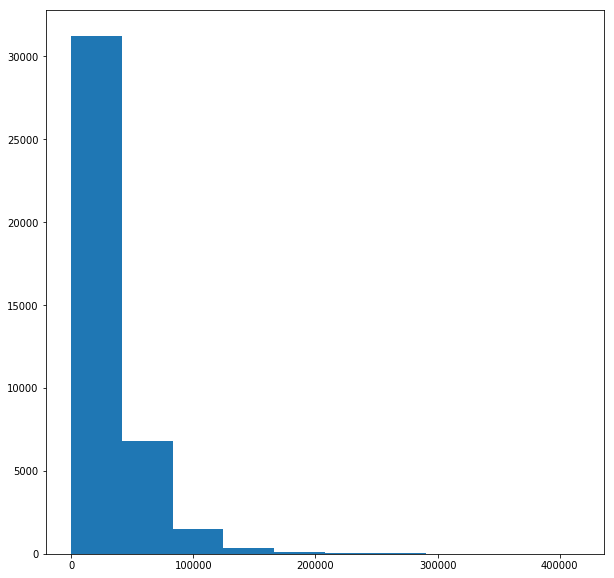

In [324]:
fig = plt.figure(figsize = (10, 10))
ax = plt.hist(train[pd.isna(train['education_type'])]['salary'])
plt.show()

In [325]:
train['education_type'].unique()

array(['Незаконченное высшее', 'Высшее', nan, 'Среднее профессиональное',
       'Среднее'], dtype=object)

### Используем данные Росстат (октябрь 2019) средних зарплат в зависимости от образования для заполнения NaN в графе образование:

In [326]:
rosstat_edu = {'Высшее': 57700,
              'Среднее профессиональное': 36900,
              'Среднее': 34800}
#Данных о незаконченном высшем, к сожалению нет, поэтому придется считать среднюю зарплату по соответствующим работникам из train
rosstat_edu['Незаконченное высшее'] = train[train['education_type'] == 'Незаконченное высшее']['salary'].mean()
print('Средняя зарплата работников с незаконченным высшим:', rosstat_edu['Незаконченное высшее'])

for i in train[pd.isna(train['education_type'])].index:
    if (train.at[i, 'salary'] > rosstat_edu['Высшее']):
        train.at[i, 'education_type'] = 'Высшее'
    elif (train.at[i, 'salary'] > rosstat_edu['Незаконченное высшее']):
        train.at[i, 'education_type'] = 'Незаконченное высшее'
    elif (train.at[i, 'salary'] > rosstat_edu['Среднее профессиональное']):
        train.at[i, 'education_type'] = 'Среднее профессиональное'
    else:
        train.at[i, 'education_type'] = 'Среднее'

Средняя зарплата работников с незаконченным высшим: 41551.10823415889


### 3. Уберем даты

In [327]:
train = train.drop(['creation_date', 'modification_date', 'publish_date'], axis = 1)

### 4. Completeness rate нужно привести к долям

In [328]:
train['completeness_rate'].describe()

count    306258.000000
mean         69.068161
std          17.125877
min           0.000000
25%          61.000000
50%          71.000000
75%          81.000000
max         100.000000
Name: completeness_rate, dtype: float64

### Выбросов в completeness rate нет

In [329]:
train['completeness_rate'] = train['completeness_rate'] / 100

### 5. Переведем NaN значения в графе has_qualifications в отдельную категорию

In [330]:
train['has_qualifications'].fillna('-', inplace = True)

### 6. Experience

In [331]:
print('NaN значений в графе experience:', len(train[pd.isna(train['experience'])]))

NaN значений в графе experience: 0


#### Посмотрим есть ли выбросы

In [332]:
train['experience'].describe()

count    306258.000000
mean          5.748144
std           7.745297
min           0.000000
25%           0.000000
50%           3.000000
75%           9.000000
max         937.000000
Name: experience, dtype: float64

#### Действительно, есть. Нужно их заменить.
#### Если возраст указан, заменим опыт на медианный опыт для группы +- 2 года
#### Если не указан, заменим на медианный опыт работы

In [333]:
median_experience = train['experience'].median()
median_experience_groups = []
for i in range(8):
    median_experience_groups.append(train[(train['age'] - 18) // 5 == i]['experience'].median())
median_experience_groups.append(train[(train['age'] - 18) // 5 >= 8]['experience'].median())

for i in train[(pd.isna(train['experience'])) | (train['experience'] > 50)].index:
    if (pd.isna(train.at[i, 'age']) or train.at[i, 'age'] >= 100 or train.at[i, 'age'] < 18):
        train.at[i, 'experience'] = median_experience
    else:
        if (train.at[i, 'age'] >= 58 and train.at[i, 'age'] < 100):
            train.at[i, 'experience'] = median_experience_groups[8]
        elif (train.at[i, 'age'] >= 18):
            train.at[i, 'experience'] = median_experience_groups[int((train.at[i, 'age'] - 18) // 5)]

### 7. age

In [334]:
print('NaN значений в графе возраст:', len(train[pd.isna(train['age'])]))

NaN значений в графе возраст: 7809


#### Заменим NaN значения в возрасте на средний возраст по опыту работы, выбросы заменим на медианный возраст

In [335]:
median_age = train['age'].median()
# группы по опыту работы: 0 лет,(0-2]лет, 2-5лет,5-10лет, 10-15лет, 15-20лет, 20-25лет, 25-35лет, больше 
median_group1 = train[train['experience'] == 0]['age'].median()
median_group2 = train[(train['experience'] > 0) & (train['experience'] <= 2)]['age'].median()
median_group3 = train[(train['experience'] > 2) & (train['experience'] <= 5)]['age'].median()
median_group4 = train[(train['experience'] > 5) & (train['experience'] <= 10)]['age'].median()
median_group5 = train[(train['experience'] > 10) & (train['experience'] <= 15)]['age'].median()
median_group6 = train[(train['experience'] > 15) & (train['experience'] <= 20)]['age'].median()
median_group7 = train[(train['experience'] > 20) & (train['experience'] <= 25)]['age'].median()
median_group8 = train[(train['experience'] > 25) & (train['experience'] <= 35)]['age'].median()
median_group9 = train[train['experience'] > 35]['age'].median()

for i in train[(pd.isna(train['age'])) | (train['age'] < 18) | (train['age'] > 85)].index:
    if (train.at[i,'experience'] == 0):
        train.at[i, 'age'] = median_group1
    if ((train.at[i, 'experience'] > 0)|(train.at[i, 'experience'] <= 2)):
        train.at[i, 'age'] = median_group2
    if ((train.at[i, 'experience'] > 2)|(train.at[i, 'experience'] <= 5)):
        train.at[i, 'age'] = median_group3
    if ((train.at[i, 'experience'] > 5)|(train.at[i, 'experience'] <= 10)):
        train.at[i, 'age'] = median_group4
    if ((train.at[i, 'experience'] > 10)|(train.at[i, 'experience'] <= 15)):
        train.at[i, 'age'] = median_group5
    if ((train.at[i, 'experience'] > 15)|(train.at[i, 'experience'] <= 20)):
        train.at[i, 'age'] = median_group6
    if ((train.at[i, 'experience'] > 20)|(train.at[i, 'experience'] <= 25)):
        train.at[i, 'age'] = median_group7
    if ((train.at[i, 'experience'] > 25)|(train.at[i, 'experience'] <= 35)):
        train.at[i, 'age'] = median_group8
    if (train.at[i, 'experience'] > 35):
        train.at[i, 'age'] = median_group9

### 8. drive licences

#### Представим этот признак в виде 5 признаков

In [336]:
train['drive_licence_A'] = 0
train['drive_licence_B'] = 0
train['drive_licence_C'] = 0
train['drive_licence_D'] = 0
train['drive_licence_E'] = 0

for i in train[pd.isna(train['drive_licences']) == False].index:
    for licence in train.at[i, 'drive_licences'][1:-1].split(', '):
        train.at[i, 'drive_licence_' + licence] = 1

In [337]:
train = train.drop(['drive_licences'], axis = 1)

### 9. wordskills

#### Заменим NaN на '-'

In [338]:
train['is_worldskills_participant'].fillna('-', inplace = True)

### 10. relocation, travel, retraining

#### Заменим NaN на несогласие

In [339]:
train['relocation_ready'].fillna(False, inplace = True)
train['travel_ready'].fillna(False, inplace = True)
train['retraining_ready'].fillna(False, inplace = True)

train['relocation_ready'] = train['relocation_ready'].astype(int)
train['travel_ready'] = train['travel_ready'].astype(int)
train['retraining_ready'] = train['retraining_ready'].astype(int)

### 11. gender

#### заменим NaN на наиболее вероятный класс

In [340]:
nan_class = list(dict(train['gender'].value_counts()).keys())[0]
train['gender'].fillna(nan_class, inplace = True)

### 12. Поделим возраст на группы в зависимости от средней заработной платы

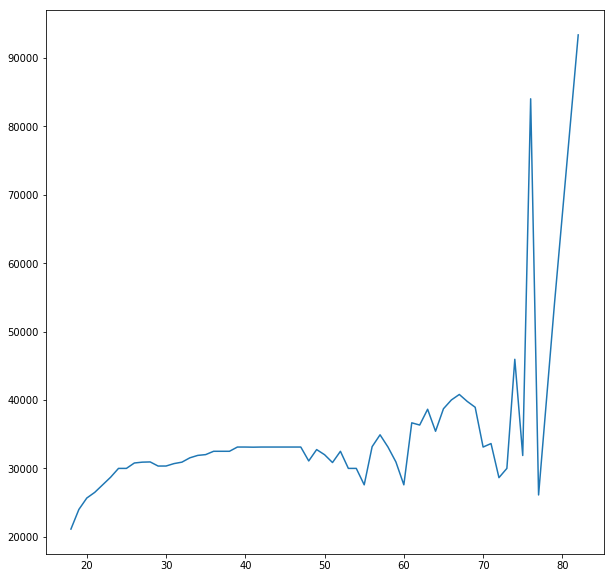

In [341]:
ages = sorted(train['age'].unique())
salaries = [train[train['age'] == x]['salary'].median() for x in ages]

fig = plt.figure(figsize = (10, 10))
ax = plt.plot(ages, salaries)
plt.show()

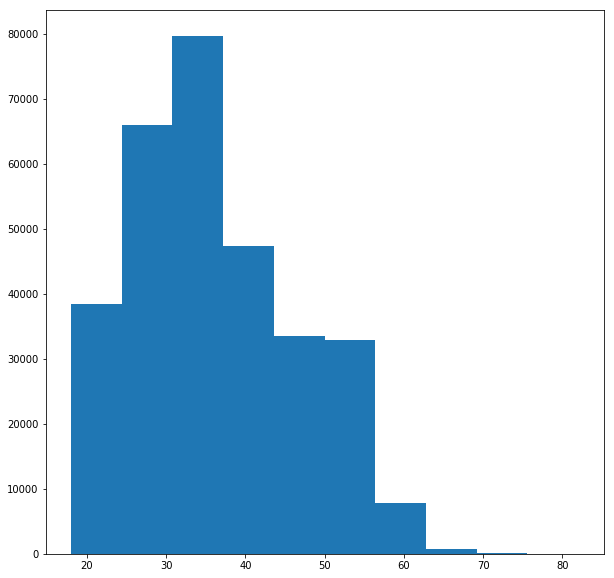

In [342]:
fig = plt.figure(figsize = (10, 10))
ax = plt.hist(train['age'])
plt.show()

In [343]:
# группы: <26, 26-34, 34-38, 38-47, 47-55, >55 лет
def group_ages(df):
    df['age_group'] = 0
    df.loc[df['age'] < 26, 'age_group'] = 1
    df.loc[(df['age'] >= 26) & (df['age'] < 34), 'age_group'] = 2
    df.loc[(df['age'] >= 34) & (df['age'] < 38), 'age_group'] = 3
    df.loc[(df['age'] >= 38) & (df['age'] < 47), 'age_group'] = 4
    df.loc[(df['age'] >= 47) & (df['age'] <= 55), 'age_group'] = 5
    df.loc[df['age'] > 55,'age_group'] = 6
    df = df.drop(['age'], axis = 1)
    print(df['age_group'].value_counts())
    return df

train = group_ages(train)

2    91654
4    65504
1    49200
5    46170
3    43169
6    10561
Name: age_group, dtype: int64


### 13. Поделим гражданство на более крупные группы

In [344]:
train.loc[(train['citizenship'] != 'Российская Федерация') 
          & (train['citizenship'] != 'Украина') & (train['citizenship'] != 'Республика Казахстан')
          & (train['citizenship'] != 'Республика Беларусь'), 'citizenship'] = 'Иное'

### 14. Поделим опыт работы на группы

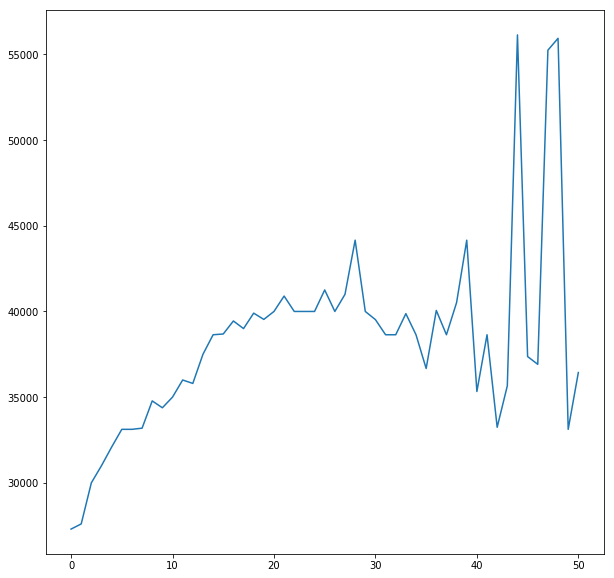

In [345]:
years = sorted(train['experience'].unique())
salaries = [train[train['experience'] == x]['salary'].median() for x in years]

fig = plt.figure(figsize = (10, 10))
ax = plt.plot(years, salaries)
plt.show()

In [346]:
#группы: 0, (0-2], (2 - 5], (5-10],(10, 15],(15, 20],(20,30], >30 

train['experience_group'] = 0
train.loc[train['experience'] == 0, 'experience_group'] = 1
train.loc[(train['experience'] > 0) & (train['experience'] <= 2), 'experience_group'] = 2
train.loc[(train['experience'] > 2) & (train['experience'] <= 5), 'experience_group'] = 3
train.loc[(train['experience'] > 5) & (train['experience'] <= 10), 'experience_group'] = 4
train.loc[(train['experience'] > 10) & (train['experience'] <= 15), 'experience_group'] = 5
train.loc[(train['experience'] > 15) & (train['experience'] <= 20), 'experience_group'] = 6
train.loc[(train['experience'] > 20) & (train['experience'] <= 30), 'experience_group'] = 7
train.loc[train['experience'] > 30, 'experience_group'] = 8
train = train.drop(['experience'], axis = 1)

In [347]:
train['position'] = train['position'].str.lower()

### Используем данные о зарплате в регионах

In [348]:
import json

with open('regions.json', encoding='raw_unicode_escape') as f:
    d = json.loads(f.read().encode('raw_unicode_escape').decode())
for key in d:
    d[key] = int(d[key])

In [349]:
train = train.replace({'region':d})

### Исправим выбросы в salary_desired

In [350]:
for i in train[(train['salary_desired'] <= 10000) | (train['salary_desired'] > 200000)].index:
    train.at[i,'salary_desired'] = train.at[i, 'region']

In [351]:
train['salary_desired'].describe()

count    306258.000000
mean      34051.838584
std       19215.510109
min       10005.000000
25%       20760.000000
50%       30000.000000
75%       40000.000000
max      200000.000000
Name: salary_desired, dtype: float64

In [352]:
train.reset_index(inplace = True)

In [353]:
city_dict = {}
for i in range(len(train)):
    if (pd.isna(train.at[i, 'locality_name'])):
        continue
    if (train.at[i, 'locality'] not in city_dict):
        city_dict[train.at[i,'locality']] = train.at[i,'locality_name']
        continue
    if ((train.at[i, 'locality'] in city_dict) & (train.at[i, 'locality_name'] != city_dict[train.at[i, 'locality']])):
        print(train.at[i, 'locality_name'], city_dict[train.at[i, 'locality']])

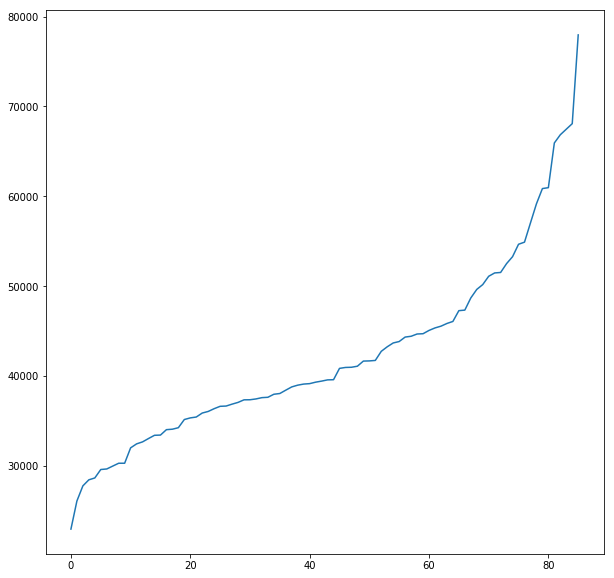

In [53]:

regions_arr = train['region'].unique()
regions_means = []
for region in regions_arr:
    regions_means.append(train[train['region'] == region]['salary'].mean())

fig = plt.figure(figsize = (10, 10))
ax = plt.plot([x for x in range(len(regions_arr))], sorted(regions_means))
plt.show()

In [51]:
train['drive_licences'].unique()

array(['[B]', nan, '[B, C]', '[B, C, E]', '[A, B, C]', '[C]', '[A, B]',
       '[B, C, D]', '[A, B, C, D]', '[B, C, D, E]', '[A, B, C, D, E]',
       '[A, B, C, E]', '[B, D]', '[A]', '[D]', '[C, D]', '[A, B, E]',
       '[B, E]', '[D, E]', '[C, E]', '[A, C, D]', '[A, B, D]', '[E]',
       '[C, D, E]', '[A, C]', '[B, D, E]', '[A, D, E]', '[A, D]',
       '[A, C, E]', '[A, B, D, E]'], dtype=object)

In [54]:
train['age'].unique()

array([  21.,   26.,   36.,   34.,   25.,   49.,   nan,   28.,   32.,
         23.,   38.,   41.,   53.,   27.,   37.,   31.,   33.,   54.,
         44.,   55.,   57.,   42.,   40.,   29.,   30.,   60.,   45.,
         39.,   19.,   22.,   56.,   58.,   52.,   35.,   46.,   24.,
         43.,   59.,   16.,   18.,   50.,   51.,   47.,   20.,   48.,
         70.,   61.,   17.,   68.,   63.,   66.,   72.,   15.,   64.,
         62.,   67.,   65.,   69.,   79.,   73.,   71.,    5.,    7.,
          4.,   75.,  132.,   77.,  119.,   74.,   14.,   76., 1933.,
       1928.,    2., 1926., 1936.,    8., 1924.,    3.,   82.])

### убрать строки с странным возрастом и без региона

### position?

### город - столица региона/нет

In [ ]:
train['']